# 데이터 불러오기

## 데이터 정보
###원천 데이터
- tif 파일 형태
- 비교쌍 형태 (N년, N+1년)로 사진 두 장을 가로로 이어붙여놓음.
- 각 사진 실면적 60m * 60m
- 각 사진 픽셀 1508 * 704

### 라벨링 데이터
```json
"info": {
  "info.name": "항공영상 도시건물 변화탐지 데이터",
  "info.id": "TIFF_change_safe_01",
  "info.date_created": "2021-04-09 09:00:00",
  "info.src_path": "/dataSet/change",
  "info.label_path": "/dataSet/change",
  "info.category": 5,
  "info.type": 1
}
```

|번호|항목 한글명|항목 영문명|길이|타입|필수여부|
|:---:|:---:|:---:|:---:|:---:|:---:|
|1-1|데이터셋명|info.name|18|string|Y|
|1-2|데이터셋 식별자|info.id|-|string|Y|
|1-3|데이터셋 생성일자|info.date_created|19|string|Y|
|1-4|이미지파일 폴더 경로|info.src_path|-|string|Y|
|1-5|라벨링파일 폴더 경로|info.label_path|-|string|Y|
|1-6|데이터셋 카테고리|info.category|1|int|Y|
|1-7|데이터셋 타입|info.type|1|int|Y|

- `info.category`는 0 ~ 8의 9개 값을 가짐.
  - 0: 제1종 전용주거지역
  - 1: 제2종 전용주거지역
  - 2: 제1종 일반주거지역
  - 3: 제2종 일반주거지역
  - 4: 제3종 일반주거지역
  - 5: 준주거지역
  - 6: 상업지역
  - 7: 준공업지역(공업지역)
  - 8: 녹지지역

- `info.type`은 항상 1 (이미지) 의 값을 가짐.

```json
"images": {
  "images.id": "2017_KRG_JJG_000037.tif",
  "images.type": "TIF",
  "images.data_captured": "2021-10-29 13:34:50",
  "images.size": 1634,
  "images.width": 1508,
  "images.height": 754,
  "images.h_resolution": 150,
  "images.v_resolution": 150,
  "images.bit": 24
}
```

|번호|항목 한글명|항목 영문명|길이|타입|필수여부|
|:---:|:---:|:---:|:---:|:---:|:---:|
|2-1|이미지 식별자|images.id|-|string|Y|
|2-2|이미지 파일 확장자|images.type|3|string|Y|
|2-3|이미지 생성 일자|images.data_captured|19|string|Y|
|2-4|이미지 파일용량(KB)|images.size|4|int|Y|
|2-5|이미지 가로크기(픽셀)|images.width|4|int|Y|
|2-6|이미지 세로크기(픽셀)|images.height|3|int|Y|
|2-7|이미지 수평해상도(DPI)|images.h_resolution|3|int|Y|
|2-8|이미지 수직해상도(DPI)|images.v_resolution|3|int|Y|
|2-9|이미지 비트수준(bit)|images.bit|2|int|Y|

- 실제 데이터 주어지면, `images.size`와 같은 값들이 실제로 통일되어 있는지 체크해봐야 함. 

``` json
"annotations": [
  {
    "polygon.id": "PLG_000000",
    "polygon.name": "building",
    "polygon.points": [
      [1215.255, 2.288], [754.613, 4.416], [755.18, 129.21]
    ],
    "polygon.shape": 1,
    "polygon.shift": 2,
    "polygon.updates": [
      1, 2, 4
    ]
  }
]
```

|번호|항목 한글명|항목 영문명|길이|타입|필수여부|
|:---:|:---:|:---:|:---:|:---:|:---:|
|3-1|폴리곤 식별자|polygon.id|10|string|Y|
|3-2|폴리곤 객체타입|polygon.name|8|string|Y|
|3-3|이미지내 폴리곤내 위치|polygon.points|-|array|Y|
|3-4|변화건물(폴리곤) 외형|polygon.shape|1|int|Y|
|3-5|건물 변화유형|polygon.shift|-|int|Y|
|3-6|건물 갱신유형|polygon.update|-|array|-|
|3-7|변화건물 주소|polygon.address|-|string|-|

- `polygon.name`은 'building'으로 통일되어 있는 것으로 추측
- `polygon.shape`은 0 ~ 1의 두 가지 값을 가짐
  - 0: 전체가 온전한 건물
  - 1: 일부가 잘린 건물
- `polygon.shift`는 0 ~ 2의 세 가지 값을 가짐
  - 0: 신축
  - 1: 소멸
  - 2: 갱신
- `polygon.update`는 0 ~ 4의 다섯 가지 값을 가짐
  - 0: 층 변화
  - 1: 철골구조 완성
  - 2: 설치.구조물 추가
  - 3: 옥상 색상 변화
  - 4: 외곽선 변화
- `polygon.update`와 `polygon.address`는 데이터가 NaN일 수도 있음을 인지

## Data Preprocessing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Making a softlink
!ln -s /content/drive/MyDrive/MAICON/ /content/

In [ ]:
### RUN ONLY ONCE!
!mkdir datasets
%cd /content/datasets
!mkdir image
!mkdir json

/content/datasets


In [ ]:
### Don't run when using png_dataset
### RUN ONLY ONCE!
### yxxshin


import zipfile
from tqdm import tqdm

## Images
# with zipfile.ZipFile('/content/Original_dataset/image/TS1_00_제1종전용주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/TS2_01_제2종전용주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/TS3_02_제1종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/TS4_03_제2종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

with zipfile.ZipFile('/content/Original_dataset/image/TS5_04_제3종일반주거지역.zip') as zf:
  for member in tqdm(zf.infolist(), desc = 'Extracting  '):
      zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/TS6_05_준주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/TS7_06_상업지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/TS8_07_준공업지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/TS9_08_녹지지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS1_00_제1종전용주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS2_01_제2종전용주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS3_02_제1종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS4_03_제2종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS5_04_제3종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS6_05_준주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS7_06_상업지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS8_07_준공업지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')

# with zipfile.ZipFile('/content/Original_dataset/image/VS9_08_녹지지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/image')


## Labels
# with zipfile.ZipFile('/content/Original_dataset/ann/TL1_00_제1종전용주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/TL2_01_제2종전용주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/TL3_02_제1종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/TL4_03_제2종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

with zipfile.ZipFile('/content/Original_dataset/ann/TL5_04_제3종일반주거지역.zip') as zf:
  for member in tqdm(zf.infolist(), desc = 'Extracting  '):
      zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/TL6_05_준주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/TL7_06_상업지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/TL8_07_준공업지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/TL9_08_녹지지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL1_00_제1종전용주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL2_01_제2종전용주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL3_02_제1종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL4_03_제2종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL5_04_제3종일반주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL6_05_준주거지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL7_06_상업지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL8_07_준공업지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# with zipfile.ZipFile('/content/Original_dataset/ann/VL9_08_녹지지역.zip') as zf:
#   for member in tqdm(zf.infolist(), desc = 'Extracting  '):
#       zf.extract(member, '/content/datasets/json')

# !mkdir json
# !mkdir image
# !unzip /content/Original_dataset/image/ -d /content/datasets/json > /dev/null 2>&1
# !unzip /content/Original_dataset/ann/ -d /content/datasets/image > /dev/null 2>&1

FileNotFoundError: ignored

In [ ]:
#Terry Kim: Training only on sample data

import zipfile
from tqdm import tqdm

with zipfile.ZipFile('/content/drive/MyDrive/MAICON//MAICON_dataset/image_data.zip') as zf:
  for member in tqdm(zf.infolist(), desc = 'Extracting  '):
      zf.extract(member, '/content/datasets/image')


with zipfile.ZipFile('/content/drive/MyDrive/MAICON//MAICON_dataset/annotation_data.zip') as zf:
  for member in tqdm(zf.infolist(), desc = 'Extracting  '):
      zf.extract(member, '/content/datasets/json')


Extracting  : 100%|██████████| 360/360 [00:01<00:00, 327.79it/s]


In [ ]:
### Don't run when using png_dataset
# 2018_KNG_2LB_000928.tif.json error: Polygon PLG_000001 has only two points
# Remove from dataset

!rm /content/datasets/image/2018_KNG_2LB_000928.tif
!rm /content/datasets/json/2018_KNG_2LB_000928.tif.json

rm: cannot remove '/content/datasets/image/2018_KNG_2LB_000928.tif': No such file or directory
rm: cannot remove '/content/datasets/json/2018_KNG_2LB_000928.tif.json': No such file or directory


In [ ]:
### Don't run when using png_dataset
# Find images with the wrong size
import glob, os
from PIL import Image

wrong_size_images = []
image_file_path = '/content/datasets/image/*.tif'
image_files = glob.glob(image_file_path)

for i in tqdm(range(len(image_files))):
  image_name = os.path.basename(image_files[i])
  image_file = [f for f in image_files if image_name in f]
  image = Image.open(image_file[0])
  if image.size != (1508, 754):
    print("\nwrong size image, saving")
    wrong_size_images.append(image_name)

print(wrong_size_images)

100%|██████████| 360/360 [00:00<00:00, 2829.74it/s]

[]


In [ ]:
### Don't run when using png_dataset
## Delete Wrong-sized Images
#RUNN
for i in tqdm(range(len(wrong_size_images))):
  image_name = wrong_size_images[i]
  image_fname = '/content/datasets/image/' + image_name
  json_fname = '/content/datasets/json/' + image_name + '.json'
  os.remove(image_fname)
  os.remove(json_fname)

0it [00:00, ?it/s]


In [ ]:
### Don't run when using png_dataset
## dataset_generation.py
#RUNN
import os, json, glob, shutil
from PIL import Image
from shapely import geometry
import PIL.ImageDraw as ImageDraw
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

def read_json_file(json_path):
    with open(json_path, encoding='utf-8-sig') as f:
        data = json.load(f)
    return data

"""Read json & image files"""
# <change the root path>
root_dir = "/content/datasets/"

# <set the path to json and image files>
json_file_path = root_dir + "json/*.json"
image_file_path = root_dir + 'image/*.tif'
json_files = glob.glob(json_file_path) 
image_files  = glob.glob(image_file_path, recursive=True)

# Extract polygons from json files
print("Read polygons...")
total_polygons = []
dataset = []
for i in tqdm(range(len(image_files))):   
    image_name = os.path.basename(image_files[i])
    json_file = [ j for j in json_files if image_name in j]
    if len(json_file) == 0:
        dataset.append({"image-name":  image_files[i],'polygons':[],'points':[]})
        continue
    json_file = json_file[0]
    json_data = read_json_file(json_file)
    each_image_data = []
    polygons = []
    points = []
    each_image_data = {"image-name": image_files[i]}  
    for annotation in json_data['annotations']:
        polygons.append(geometry.Polygon(annotation['polygon.points']))
        points.append(annotation['polygon.points'])
        total_polygons.append(geometry.Polygon(annotation['polygon.points']))
    
    each_image_data['polygons'] = polygons
    each_image_data['points'] = points
    dataset.append(each_image_data)

# Generate dataset
print("Dataset generation....")
# Create 3 folders for generated dataset: 'input1', 'input2' and 'mask'
input1_dir = root_dir + 'input1'
input2_dir = root_dir + 'input2'
mask_dir = root_dir + 'mask'
if not os.path.exists(input1_dir):
    os.makedirs(input1_dir)
if not os.path.exists(input2_dir):
    os.makedirs(input2_dir)
if not os.path.exists(mask_dir):
    os.makedirs(mask_dir)    

save_path = root_dir + "%s/%s"
mask_path = root_dir + "mask/%s"
for data_item in tqdm(dataset):
    image = Image.open(data_item['image-name'])
    image = np.asarray(image)
    img1 = Image.fromarray(image[:,:754,:])
    img2 = Image.fromarray(image[:,754:,:])
    img1.save(save_path%("input1",(os.path.basename(data_item['image-name'])).replace(".tif",".png")))
    img2.save(save_path%("input2",(os.path.basename(data_item['image-name'])).replace(".tif",".png")))
    mask_image = Image.fromarray(np.zeros_like(np.asarray(image)))
    

    if len(data_item['points']) !=0:
        draw = ImageDraw.Draw(mask_image)
        for each_poly_points in data_item['points']: 
            if len(each_poly_points) == 0: continue
            points = (tuple([tuple(point) for point in each_poly_points]))
            points = (*points ,points[0])
            draw.polygon((points), fill='white')
    
    mask_image = np.asarray(mask_image)
    img1 =  mask_image[:,:754,:]
    img2 =  mask_image[:,754:,:]
    mask_image = Image.fromarray(img1 + img2)
    mask_image.save(mask_path%(os.path.basename(data_item['image-name'])).replace(".tif",".png"))


# Split the dataset into train and set with ratio: 0.8:0.2
data_imgList = os.listdir(root_dir + 'input1')
data_train, data_val = train_test_split(data_imgList, test_size=0.2, random_state=42)

# """copy imgs into train & test folder"""
in_path = root_dir
out_path = root_dir + 'train'
os.makedirs(out_path)
os.makedirs(out_path+'/input1')
os.makedirs(out_path+'/input2')
os.makedirs(out_path+'/mask')
shutil.copytree(out_path, root_dir + 'val')

for im_id in data_train:
    shutil.copy(in_path + '/input1/' + im_id, out_path + '/input1/')
    shutil.copy(in_path + '/input2/' + im_id, out_path + '/input2/')
    shutil.copy(in_path + '/mask/' + im_id, out_path + '/mask/')
    
out_path = root_dir + 'val'
for im_id in data_val:
    shutil.copy(in_path + '/input1/' + im_id, out_path + '/input1/')
    shutil.copy(in_path + '/input2/' + im_id, out_path + '/input2/')
    shutil.copy(in_path + '/mask/' + im_id, out_path + '/mask/')


Read polygons...


100%|██████████| 360/360 [00:00<00:00, 5793.53it/s]


Dataset generation....


100%|██████████| 360/360 [02:17<00:00,  2.62it/s]


In [ ]:
### Don't run when using png_dataset
# Saving images - OPTIONAL
#yxxshin

zipfile_input1 = zipfile.ZipFile('/content/input1.zip', 'w')
input1_files = glob.glob('/content/datasets/input1/*.png')
with zipfile.ZipFile('/content/input1.zip', 'w') as zipfile_input1:
  for i in tqdm(range(len(input1_files))):   
    fname = os.path.basename(input1_files[i])
    target_file = [ j for j in input1_files if fname in j][0]
    zipfile_input1.write(target_file)
  zipfile_input1.close()

zipfile_input2 = zipfile.ZipFile('/content/input2.zip', 'w')
input2_files = glob.glob('/content/datasets/input2/*.png')
with zipfile.ZipFile('/content/input2.zip', 'w') as zipfile_input2:
  for i in tqdm(range(len(input2_files))):   
    fname = os.path.basename(input2_files[i])
    target_file = [ j for j in input2_files if fname in j][0]
    zipfile_input2.write(target_file)
  zipfile_input2.close()

zipfile_mask = zipfile.ZipFile('/content/mask.zip', 'w')
mask_files = glob.glob('/content/datasets/mask/*.png')
with zipfile.ZipFile('/content/mask.zip', 'w') as zipfile_mask:
  for i in tqdm(range(len(mask_files))):   
    fname = os.path.basename(mask_files[i])
    target_file = [ j for j in mask_files if fname in j][0]
    zipfile_mask.write(target_file)
  zipfile_mask.close()

100%|██████████| 360/360 [00:00<00:00, 3213.68it/s]


In [ ]:
###  RUN if you are using png_dataset!
#yxxshin
import zipfile
from tqdm import tqdm
import os, json, glob
from PIL import Image
import numpy as np
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split

input1_path = '/content/drive/MyDrive/MAICON/png_dataset/input1.zip'
input2_path = '/content/drive/MyDrive/MAICON/png_dataset/input2.zip'
mask_path = '/content/drive/MyDrive/MAICON/png_dataset/mask.zip'

with zipfile.ZipFile(input1_path) as zf:
  for member in tqdm(zf.infolist(), desc = 'Extracting  '):
      zf.extract(member, '/')

with zipfile.ZipFile(input2_path) as zf:
  for member in tqdm(zf.infolist(), desc = 'Extracting  '):
      zf.extract(member, '/')

with zipfile.ZipFile(mask_path) as zf:
  for member in tqdm(zf.infolist(), desc = 'Extracting  '):
      zf.extract(member, '/')

# Split the dataset into train and set with ratio: 0.8:0.2
root_dir = "/content/datasets/"
data_imgList = os.listdir(root_dir + 'input1')
data_train, data_val = train_test_split(data_imgList, test_size=0.2, random_state=42)

# """copy imgs into train & test folder"""
in_path = root_dir
out_path = root_dir + 'train'
os.makedirs(out_path)
os.makedirs(out_path+'/input1')
os.makedirs(out_path+'/input2')
os.makedirs(out_path+'/mask')
shutil.copytree(out_path, root_dir + 'val')

for im_id in tqdm(data_train):
    shutil.copy(in_path + '/input1/' + im_id, out_path + '/input1/')
    shutil.copy(in_path + '/input2/' + im_id, out_path + '/input2/')
    shutil.copy(in_path + '/mask/' + im_id, out_path + '/mask/')
    
out_path = root_dir + 'val'
for im_id in tqdm(data_val):
    shutil.copy(in_path + '/input1/' + im_id, out_path + '/input1/')
    shutil.copy(in_path + '/input2/' + im_id, out_path + '/input2/')
    shutil.copy(in_path + '/mask/' + im_id, out_path + '/mask/')


FileNotFoundError: ignored

# Train Settings

## Libraries

In [ ]:
import os
import cv2
import time
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import albumentations as A
import matplotlib.pyplot as plt
import PIL

warnings.filterwarnings("ignore")

In [ ]:
!pip install tensorboardX


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 33.1 MB/s 


In [ ]:
from tensorboardX import SummaryWriter

In [ ]:
# Install SMP with no bash output
# !pip install git+https://github.com/qubvel/segmentation_models.pytorch > /dev/null 2>&1

In [ ]:
# import segmentation_models_pytorch as smp

In [ ]:
# Installing CDP (Change Dectection Pytorch)
#!pip install git+https://github.com/likyoo/change_detection.pytorch > /dev/null 2>&1
#!pip install git+https://github.com/yxxshin/change_detection.pytorch > /dev/null 2>&1

!pip install git+https://github.com/terrykim1211/change_detection.pytorch > /dev/null 2>&1

In [ ]:
pip install pytorch_toolbelt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 13.8 MB/s 


In [ ]:
import change_detection_pytorch as cdp

ModuleNotFoundError: ignored

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


In [ ]:
## Fixing "CUDA out of memory"

import gc
gc.collect()
torch.cuda.empty_cache()

## Model

In [ ]:
from change_detection_pytorch.unetplusplus.model import UnetPlusPlus
model = UnetPlusPlus(
    encoder_name = "timm-regnety_320",
    encoder_depth = 5,
    encoder_weights = "imagenet",
    in_channels = 3,
    classes = 2,
    slam_encoder = True,
    decoder_attention_type = "scse",
    fusion_form = "diff",
    decoder_channels = [384, 256, 128, 64, 32],
    head = "cond",
)

# https://github.com/pytorch/vision/issues/2068
# https://blog.csdn.net/m0_61927224/article/details/125770533

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-regnet/regnety_320-ba464b29.pth" to /root/.cache/torch/hub/checkpoints/regnety_320-ba464b29.pth


  0%|          | 0.00/554M [00:00<?, ?B/s]

## DataLoader

In [ ]:
from change_detection_pytorch.datasets.custom import CustomDataset

class SatelliteDataset(CustomDataset):
  def __init__(self, img_dir, sub_dir_1, sub_dir_2, ann_dir, img_suffix, 
               seg_map_suffix, transform = None, split = None, data_root = None, test_mode = False, size = 256, debug = False):
    super().__init__(img_dir, sub_dir_1, sub_dir_2, ann_dir, img_suffix,
                     seg_map_suffix, transform, split, data_root, test_mode, size, debug)
    
  def get_default_transform(self):
    """ Default Transformation (Train data) """
    
    default_transform = A.Compose([
        A.OneOf(
            [
              A.HorizontalFlip(p = 1),
              A.VerticalFlip(p = 1),
              A.RandomRotate90(p = 1),
            ],
            p = 1,
        ),
        A.Resize(256, 256),
        A.pytorch.ToTensorV2()
    ], additional_targets = {'image_2': 'image'})

    return default_transform
  
  def get_test_transform(self):
    """ Test Transformation """
    
    test_transform = A.Compose([
        A.Resize(256, 256),
        A.pytorch.ToTensorV2()
    ], additional_targets = {'image_2': 'image'})

    return test_transform
  

  def __getitem__(self, idx):
    if not self.ann_dir:
      # Test Data
      img1, img2, fname = self.prepare_img(idx)
      transformed_data = self.transform(image = img1, image_2 = img2)
      img1, img2 = transformed_data['image'], transformed_data['image_2']
      img1 = img1.type(torch.FloatTensor)
      img2 = img2.type(torch.FloatTensor)
      return img1, img2, fname
    
    else:
      img1, img2, ann, fname = self.prepare_img_ann(idx)
      transformed_data = self.transform(image = img1, image_2 = img2, mask = ann)
      img1, img2, ann = transformed_data['image'], transformed_data['image_2'], transformed_data['mask']
      img1 = img1.type(torch.FloatTensor)
      img2 = img2.type(torch.FloatTensor)
      ann = ann.type(torch.FloatTensor)
      return img1, img2, ann, fname


In [ ]:
train_dataset = SatelliteDataset('/content/datasets/train',
                                sub_dir_1 = 'input1',
                                sub_dir_2 = 'input2',
                                img_suffix = '.png',
                                ann_dir = '/content/datasets/train/mask',
                                seg_map_suffix = '.png',
                                size = 754,
                                debug = False)

valid_dataset = SatelliteDataset('/content/datasets/val',
                                 sub_dir_1 = 'input1',
                                 sub_dir_2 = 'input2',
                                 img_suffix = '.png',
                                 ann_dir = '/content/datasets/val/mask',
                                 seg_map_suffix = '.png',
                                 size = 754,
                                 debug = False)

Loaded 288 images
Loaded 72 images


In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 4, shuffle = True, num_workers = 0)
valid_loader = DataLoader(valid_dataset, batch_size = 1, shuffle = False, num_workers = 0)

# DataLoader: (image1, image2, mask, filename)

2016_YCG_JJG_000012.png
torch.Size([256, 256])
torch.Size([3, 256, 256])


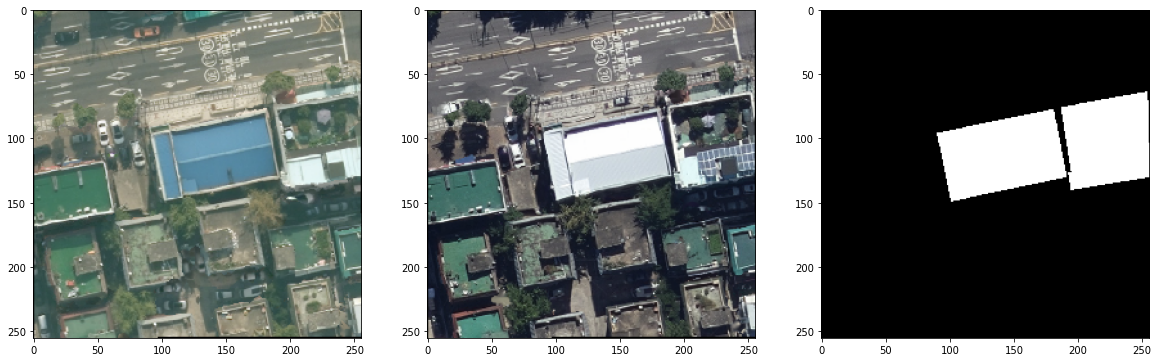

In [ ]:
# DataLoader Sanity Check

test = next(iter(train_loader))
test_x1, test_x2, test_y, test_filename = test

# Change back to uint8 for visualization
test_x1 = test_x1.type(torch.ByteTensor)
test_x2 = test_x2.type(torch.ByteTensor)
test_y = test_y.type(torch.ByteTensor)

print(test_filename[0])   # 2015_EPG_JJG_00199.png when DataLoader shuffle = False
print(test_y[0].shape)    # [256, 256]
print(test_x1[0].shape)   # [3, 256, 256]

plt.figure(figsize = (20, 8))
plt.subplot(131)
plt.imshow(test_x1[0].permute(1, 2, 0))

plt.subplot(132)
plt.imshow(test_x2[0].permute(1, 2, 0))

plt.subplot(133)
plt.imshow(test_y[0], cmap = 'gray')

## Losses


In [ ]:
# loss_weight = torch.tensor([1.0, 2.0]).to(DEVICE, dtype = torch.float32)     # TODO: Customize???
# loss = cdp.losses.SoftBCEWithLogitsLoss()
# loss = cdp.losses.DiceLoss(mode = 'binary')
loss = cdp.losses.SoftCrossEntropyLoss(smooth_factor = 0.1)
loss = cdp.losses.JaccardLoss(mode = "multiclass")


## Metrics

In [ ]:
metrics = [
    cdp.utils.metrics.IoU(activation = 'argmax2d'),
    cdp.utils.metrics.Accuracy(activation = 'argmax2d'),
    cdp.utils.metrics.Fscore(activation = 'argmax2d'),
]

## Optimizer

In [ ]:
'''
optimizer = optim.SGD([
    dict(params = model.parameters(), lr = 1e-4, momentum = 0.7)
])
'''

optimizer = optim.Adam([
    dict(params = model.parameters(), lr = 1e-4)
])



## Scheduler

In [ ]:
scheduler_steplr = optim.lr_scheduler.MultiStepLR(optimizer, milestones = [10,], gamma = 0.1)

## TODO: Customize?

# Train & Validation

In [ ]:
train_epoch = cdp.utils.train.TrainEpoch(
    model,
    loss = loss,
    metrics = metrics,
    optimizer = optimizer,
    device = DEVICE,
    verbose = True,
)

valid_epoch = cdp.utils.train.ValidEpoch(
    model,
    loss = loss,
    metrics = metrics,
    device = DEVICE,
    verbose = True,
)

In [ ]:
## Fixing "CUDA out of memory"

import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
max_score = 0
MAX_EPOCH = 14

writer = SummaryWriter('./log/tensorboard')
# JSON_LOG = []

best_valid_loss = 1000

for i in range(1, MAX_EPOCH + 1):

  print('\nEpoch: {}'.format(i))

  train_logs = train_epoch.run(train_loader)    # Difference from source code?
  valid_logs = valid_epoch.run(valid_loader)
  # scheduler_steplr.step()

  print('train_logs ', train_logs)
  print('valid_logs ', valid_logs)
  # JSON_LOG.append({'epoch': i, 'train_logs': train_logs, 'valid_logs': valid_logs})

  writer.add_scalars('train', train_logs, global_step = i)
  writer.add_scalars('val', valid_logs, global_step = i)
  writer.flush()

  valid_loss = valid_logs['fscore']
  if valid_loss < best_valid_loss:
    torch.save(model, './best_model.pth')
    print('Model saved!')


Epoch: 1
valid: 100%|██████████| 72/72 [00:09<00:00,  7.67it/s, JaccardLoss - 0.5106, iou_score - 0.3181, accuracy - 0.8395, fscore - 0.4484]
train_logs  {'JaccardLoss': 0.5937457958029376, 'iou_score': 0.23955687122522953, 'accuracy': 0.7557382583618167, 'fscore': 0.36667753347299165}
valid_logs  {'JaccardLoss': 0.5105708585017256, 'iou_score': 0.3180634815047046, 'accuracy': 0.839469697740343, 'fscore': 0.44837056183234114}
Model saved!

Epoch: 2
valid: 100%|██████████| 72/72 [00:09<00:00,  7.39it/s, JaccardLoss - 0.4079, iou_score - 0.3943, accuracy - 0.8993, fscore - 0.5382]
train_logs  {'JaccardLoss': 0.4065649468037818, 'iou_score': 0.42189985286030496, 'accuracy': 0.9143688943650987, 'fscore': 0.5807045420838726}
valid_logs  {'JaccardLoss': 0.40794650506642127, 'iou_score': 0.39431171502537676, 'accuracy': 0.8992549048529732, 'fscore': 0.5381889181877224}
Model saved!

Epoch: 3
valid: 100%|██████████| 72/72 [00:09<00:00,  7.25it/s, JaccardLoss - 0.3446, iou_score - 0.4621, accu

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir '/content/datasets/log/tensorboard'

# Test

In [ ]:
# Unzip folders
!mkdir sample_test
!unzip /content/drive/MyDrive/MAICON/MAICON_dataset/sample_test_ann -d /content/datasets/sample_test/json > /dev/null 2>&1
!unzip /content/drive/MyDrive/MAICON/MAICON_dataset/sample_test_image -d /content/datasets/sample_test/image > /dev/null 2>&1

In [ ]:
## dataset_generation.py
from PIL import Image
from shapely import geometry
import PIL.ImageDraw as ImageDraw

def read_json_file(json_path):
    with open(json_path, encoding='utf-8-sig') as f:
        data = json.load(f)
    return data

"""Read json & image files"""
# <change the root path>
root_dir = "/content/datasets/sample_test/"

# <set the path to json and image files>
json_file_path = root_dir + "/json/*.json"
image_file_path = root_dir + '/image/*.tif'
json_files = glob.glob(json_file_path) 
image_files  = glob.glob(image_file_path, recursive=True)

# Extract polygons from json files
print("Read polygons...")
total_polygons = []
dataset = []
for i in range(len(image_files)):   
    image_name = os.path.basename(image_files[i])
    json_file = [ j for j in json_files if image_name in j]
    if len(json_file) == 0:
        dataset.append({"image-name":  image_files[i],'polygons':[],'points':[]})
        continue
    json_file = json_file[0]
    json_data = read_json_file(json_file)
    each_image_data = []
    polygons = []
    points = []
    each_image_data = {"image-name": image_files[i]}  
    for annotation in json_data['annotations']:
        polygons.append(geometry.Polygon(annotation['polygon.points']))
        points.append(annotation['polygon.points'])
        total_polygons.append(geometry.Polygon(annotation['polygon.points']))
    
    each_image_data['polygons'] = polygons
    each_image_data['points'] = points
    dataset.append(each_image_data)

# Generate dataset
print("Dataset generation....")
# Create 3 folders for generated dataset: 'input1', 'input2' and 'mask'
input1_dir = root_dir + '/input1'
input2_dir = root_dir + '/input2'
mask_dir = root_dir + '/mask'
if not os.path.exists(input1_dir):
    os.makedirs(input1_dir)
if not os.path.exists(input2_dir):
    os.makedirs(input2_dir)
if not os.path.exists(mask_dir):
    os.makedirs(mask_dir)    

save_path = root_dir + "%s/%s"
mask_path = root_dir + "mask/%s"
for data_item in tqdm(dataset):
    image = Image.open(data_item['image-name'])
    image = np.asarray(image)
    img1 = Image.fromarray(image[:,:754,:])
    img2 = Image.fromarray(image[:,754:,:])
    img1.save(save_path%("input1",(os.path.basename(data_item['image-name'])).replace(".tif",".png")))
    img2.save(save_path%("input2",(os.path.basename(data_item['image-name'])).replace(".tif",".png")))
    mask_image = Image.fromarray(np.zeros_like(np.asarray(image)))
    

    if len(data_item['points']) !=0:
        draw = ImageDraw.Draw(mask_image)
        for each_poly_points in data_item['points']: 
            if len(each_poly_points) == 0: continue
            points = (tuple([tuple(point) for point in each_poly_points]))
            points = (*points ,points[0])
            draw.polygon((points), fill='white')
    
    mask_image = np.asarray(mask_image)
    img1 =  mask_image[:,:754,:]
    img2 =  mask_image[:,754:,:]
    mask_image = Image.fromarray(img1 + img2)
    mask_image.save(mask_path%(os.path.basename(data_item['image-name'])).replace(".tif",".png"))


# Split the dataset into train and set with ratio: 0.8:0.2
data_test = os.listdir(root_dir + 'input1')

# """copy imgs into train & test folder"""
in_path = '/content/datasets/sample_test/'
out_path = root_dir + 'test'
os.makedirs(out_path)
os.makedirs(out_path+'/input1')
os.makedirs(out_path+'/input2')
os.makedirs(out_path+'/mask')

for im_id in data_test:
    shutil.copy(in_path + 'input1/' + im_id, out_path + '/input1/')
    shutil.copy(in_path + 'input2/' + im_id, out_path + '/input2/')
    shutil.copy(in_path + 'mask/' + im_id, out_path + '/mask/')
    


Read polygons...
Dataset generation....


  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
test_dataset = SatelliteDataset('/content/datasets/sample_test',
                                sub_dir_1 = 'input1',
                                sub_dir_2 = 'input2',
                                img_suffix = '.png',
                                ann_dir = '/content/datasets/sample_test/mask',
                                seg_map_suffix = '.png',
                                size = 754,
                                debug = False)


test_loader = DataLoader(test_dataset, batch_size = 1, shuffle = False, num_workers = 0)

# test_dataset = SatelliteDataset('/content/datasets/val',
#                                  sub_dir_1 = 'input1',
#                                  sub_dir_2 = 'input2',
#                                  img_suffix = '.png',
#                                  ann_dir = '/content/datasets/val/mask',
#                                  seg_map_suffix = '.png',
#                                  size = 754,
#                                  debug = False)

# test_loader = DataLoader(test_dataset, batch_size = 1, shuffle = False, num_workers = 0)

Loaded 9 images


2015_EPG_1JY_000002.png
torch.Size([256, 256])
torch.Size([3, 256, 256])


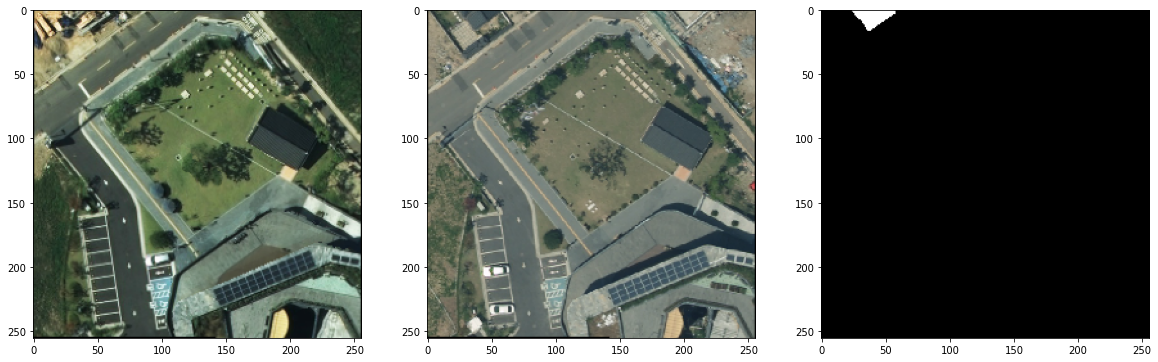

In [ ]:
# TestLoader Sanity Check
test = next(iter(test_loader))
test_x1, test_x2, test_y, test_filename = test

# Change back to uint8 for visualization
test_x1 = test_x1.type(torch.ByteTensor)
test_x2 = test_x2.type(torch.ByteTensor)
test_y = test_y.type(torch.ByteTensor)

print(test_filename[0])
print(test_y[0].shape)    # [256, 256]
print(test_x1[0].shape)   # [3, 256, 256]

plt.figure(figsize = (20, 8))
plt.subplot(131)
plt.imshow(test_x1[0].permute(1, 2, 0))

plt.subplot(132)
plt.imshow(test_x2[0].permute(1, 2, 0))

plt.subplot(133)
plt.imshow(test_y[0], cmap = 'gray')

In [ ]:
%cd /content/datasets

best_model = torch.load('/content/datasets/best_model.pth')

/content/datasets


In [ ]:
with torch.no_grad():
  best_model.eval()

  for (x1, x2, y, fname) in test_loader:
    x1, x2 = x1.float(), x2.float()
    x1, x2 = x1.to(DEVICE), x2.to(DEVICE)
 

    y_pred = best_model.forward(x1, x2)
    
    if not isinstance(y_pred, torch.Tensor): 
      y_pred = y_pred[-1]
    
    # y_pred = torch.argmax(y_pred, dim = 1).squeeze().cpu().numpy().round()
    _, y_pred = torch.max(y_pred, dim=1)
    y_pred = y_pred.squeeze().cpu().numpy().round()
    y_pred = y_pred * 255


    # Visualization
    x1, x2 = x1.type(torch.ByteTensor).squeeze(), x2.type(torch.ByteTensor).squeeze()
    y =  y.type(torch.ByteTensor).squeeze()

    plt.figure(figsize = (25, 8))
    plt.subplot(141)
    plt.title('Image1')
    plt.imshow(x1.permute(1, 2, 0))

    plt.subplot(142)
    plt.title('Image2')
    plt.imshow(x2.permute(1, 2, 0))

    plt.subplot(143)
    plt.title('Original Mask')
    plt.imshow(y, cmap = 'gray')

    plt.subplot(144)
    plt.title('Predicted Mask')
    plt.imshow(y_pred, cmap = 'gray')


RuntimeError: ignored